In [6]:
# Importing dependencies as well as the Kiva dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# Kiva dataset - Kaggle format:
kiva_loans = pd.read_csv('data-science-for-good-kiva-crowdfunding/kiva_loans.csv')
kiva_mpi_region_locations = pd.read_csv('data-science-for-good-kiva-crowdfunding//kiva_mpi_region_locations.csv')
loan_theme_ids = pd.read_csv('data-science-for-good-kiva-crowdfunding/loan_theme_ids.csv')
loan_themes_by_region = pd.read_csv('data-science-for-good-kiva-crowdfunding/loan_themes_by_region.csv')




,version https://git-lfs.github.com/spec/v1
0,oid sha256:80906c94ab4d6fef29eeaaf42934ecdc4f6...
1,size 177359


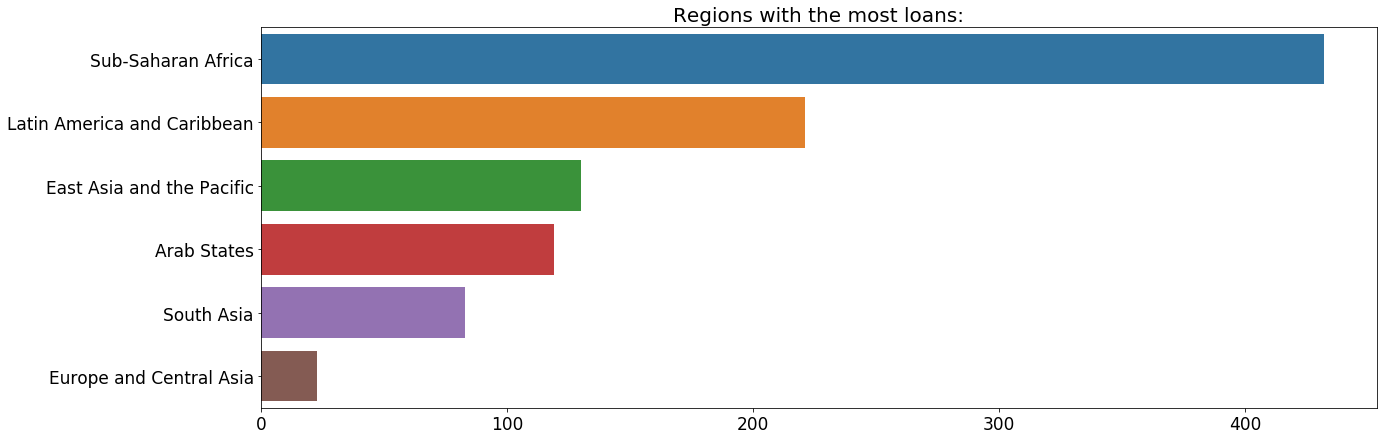

In [17]:
# Regions with the most loans
kiva_loan_regions = pd.DataFrame(kiva_mpi_region_locations['world_region'].value_counts())
kiva_loan_regions.reset_index(inplace=True)
kiva_loan_regions.columns = ['world_region', 'loan_amount']

kiva_loan_regions=pd.DataFrame(kiva_loan_regions)
kiva_loan_regions
plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=kiva_loan_regions['loan_amount'], y=kiva_loan_regions['world_region'])
barplot.set(xlabel='', ylabel='')
plt.title('Regions with the most loans:', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [11]:
# Countries with  most loans
kiva_loans_countries = pd.DataFrame(kiva_loans['country'].value_counts(sort=['loan_amount']))
kiva_loans_countries.reset_index(inplace=True)
kiva_loans_countries.columns = ['country', 'loan_amount']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=kiva_loans_countries['loan_amount'][:20], y=kiva_loans_countries['country'][:20])
barplot.set(xlabel='', ylabel='')
plt.title('Top 20 countries that got the most loans:', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

KeyError: 'country'

In [10]:
kiva_loans['loan_amount_log'] = np.log(kiva_loans['loan_amount'])

plt.figure(figsize=(20, 7))

sns.set_style("whitegrid")
boxplot = sns.boxplot(x='sector', y='loan_amount_log', data=kiva_loans)
boxplot.set(xlabel='', ylabel='')
plt.title('Displaying all sectors that got loans:', fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

KeyError: 'loan_amount'